# **Beauty Classification Using CNN**

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pwd

/content


In [4]:
#Import Library OS/Zipfile
import os
import zipfile

base_url = "/content/gdrive/MyDrive/PhotoCV"

train_zip = base_url + "/beauty.zip"
zip_ref = zipfile.ZipFile(train_zip, 'r')
zip_ref.extractall('/tmp')

val_zip = base_url + "/beauty.zip"
zip_ref = zipfile.ZipFile(val_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
# Folder training untuk class Beautiful
train_Beautiful_dir = os.path.join('/tmp/train/beautiful')

# Folder training untuk class Average
train_Average_dir = os.path.join('/tmp/train/average')

# Folder validation untuk class Beautiful
valid_Beautiful_dir = os.path.join('/tmp/valid/beautiful')

# Folder validation untuk class Average
valid_Average_dir = os.path.join('/tmp/valid/average')

In [6]:
train_Beautiful_names = os.listdir(train_Beautiful_dir)
print(train_Beautiful_names[:10])

train_Average_names = os.listdir(train_Average_dir)
print(train_Average_names[:10])

validation_Beautiful_hames = os.listdir(valid_Beautiful_dir)
print(validation_Beautiful_hames[:10])

validation_Average_names = os.listdir(valid_Average_dir)
print(validation_Average_names[:10])

['1552.jpg', '0533.jpg', '0113.jpg', '1092.jpg', '0677.jpg', '1202.jpg', '0010.jpg', '1651.jpg', '1490.jpg', '1861.jpg']
['1552.jpg', '0533.jpg', '0113.jpg', '1092.jpg', '0677.jpg', '1202.jpg', '0010.jpg', '1651.jpg', '1490.jpg', '1861.jpg']
['077.jpg', '149.jpg', '018.jpg', '025.jpg', '059.jpg', '010.jpg', '067.jpg', '046.jpg', '035.jpg', '099.jpg']
['077.jpg', '149.jpg', '018.jpg', '025.jpg', '059.jpg', '010.jpg', '067.jpg', '046.jpg', '035.jpg', '099.jpg']


Mencari informasi berapa total images dari cat dan dog di directory :

In [7]:
print('total training Beauty images:', len(os.listdir(train_Beautiful_dir)))
print('total training Average images:', len(os.listdir(train_Average_dir)))
print('total validation Beauty images:', len(os.listdir(valid_Beautiful_dir)))
print('total validation Average images:', len(os.listdir(valid_Average_dir)))

total training Beauty images: 2000
total training Average images: 2000
total validation Beauty images: 150
total validation Average images: 150


In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2 as cv

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 1

Menampilkan 8 batch dari 8 Cat and 8 Cat pictures. Kamu bisa melakukan rerun cell kembali untuk melihat fresh batch setiap waktu:

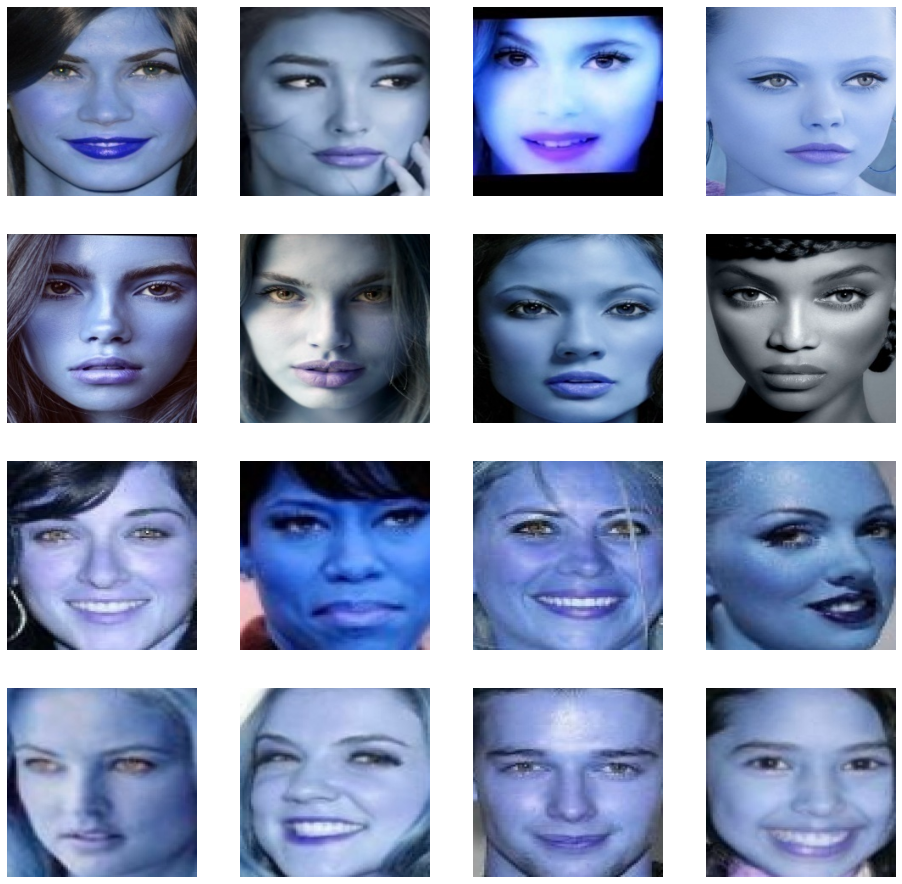

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_Beautiful_pic = [os.path.join(train_Beautiful_dir, fname) 
                for fname in train_Beautiful_names[pic_index-8:pic_index]]
next_Average_pic = [os.path.join(train_Average_dir, fname) 
                for fname in train_Average_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_Beautiful_pic + next_Average_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  im = cv.imread(img_path)
  plt.imshow(im)

plt.show()


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/train/',  # This is the source directory for training images
        classes = ['beautiful', 'average'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/valid/',  # This is the source directory for training images
        classes = ['beautiful', 'average'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 4000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


(120, 200, 200, 3)


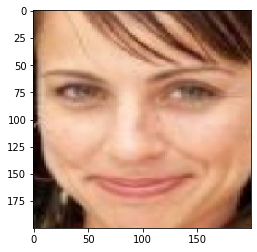

(120, 200, 200, 3)


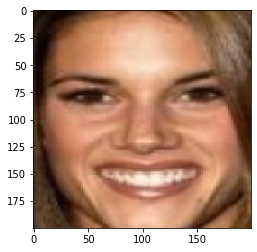

(120, 200, 200, 3)


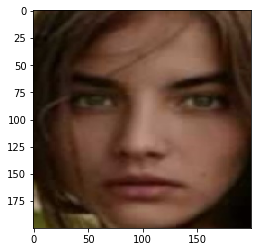

(120, 200, 200, 3)


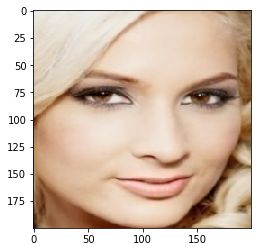

(120, 200, 200, 3)


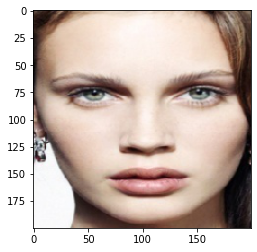

In [11]:
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()


In [12]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
# from sklearn.multiclass import OneVsRestClassifier
# from scipy import interp
from sklearn.metrics import roc_auc_score

In [13]:
model = tf.keras.models.Sequential([
#First Layer
tf.keras.layers.Conv2D(16, (3, 3),activation='relu', padding = 'same',input_shape = (200, 200, 3)), 
tf.keras.layers.MaxPooling2D(2,2),
#Second Layer                                   
tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
#Third Layer                                   
tf.keras.layers.Conv2D(64, (3, 3),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Flatten(), 
tf.keras.layers.Dense(512, activation= 'relu'), 
tf.keras.layers.Dense(1, activation= 'sigmoid')]) 

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

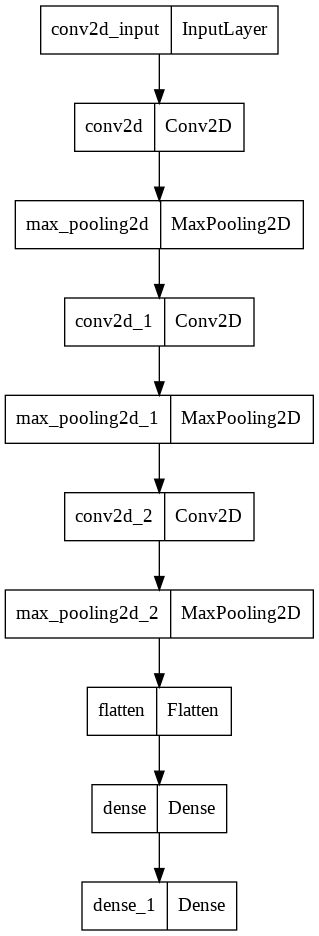

In [15]:
tf.keras.utils.plot_model(model)

In [16]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [17]:
%%time
history = model.fit(train_generator,
      steps_per_epoch=5,  
      epochs=13,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/13
5/5 [==============================] - 21s 4s/step - loss: 1.3973 - accuracy: 0.5133 - val_loss: 1.0621 - val_accuracy: 0.0132
Epoch 2/13
5/5 [==============================] - 15s 3s/step - loss: 0.7080 - accuracy: 0.5250 - val_loss: 0.6047 - val_accuracy: 0.9868
Epoch 3/13
5/5 [==============================] - 17s 3s/step - loss: 0.6973 - accuracy: 0.4683 - val_loss: 0.6557 - val_accuracy: 0.9868
Epoch 4/13
5/5 [==============================] - 17s 3s/step - loss: 0.6772 - accuracy: 0.5533 - val_loss: 0.7010 - val_accuracy: 0.3224
Epoch 5/13
5/5 [==============================] - 17s 3s/step - loss: 0.6275 - accuracy: 0.6517 - val_loss: 0.4287 - val_accuracy: 0.8553
Epoch 6/13
5/5 [==============================] - 17s 3s/step - loss: 0.5391 - accuracy: 0.7567 - val_loss: 0.3615 - val_accuracy: 0.8158
Epoch 7/13
5/5 [==============================] - 17s 4s/step - loss: 0.4911 - accuracy: 0.7683 - val_loss: 0.7171 - val_accuracy: 0.5855
Epoch 8/13
5/5 [==================

## Accuracy, ROC Curve, and AUC

Evaluasi accuracy model:

In [18]:
model.evaluate(validation_generator)

16/16 [==============================] - 3s 185ms/step - loss: 0.4466 - accuracy: 0.7900


[0.4466197192668915, 0.7900000214576721]

In [19]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

16/16 [==============================] - 3s 185ms/step


In [20]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [21]:
roc_auc = auc(fpr, tpr)

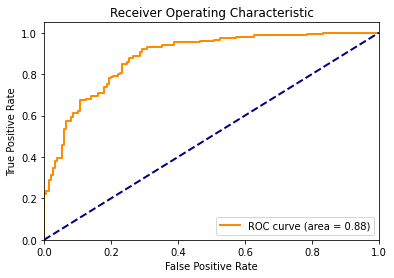

In [22]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [23]:
model.save('model_2.h5')

Saving zee_jkt48_anak_fadli_akhmad-20191216-002-non_fotografer_kly.jpg to zee_jkt48_anak_fadli_akhmad-20191216-002-non_fotografer_kly (1).jpg
[0.]
zee_jkt48_anak_fadli_akhmad-20191216-002-non_fotografer_kly.jpg you're beautiful


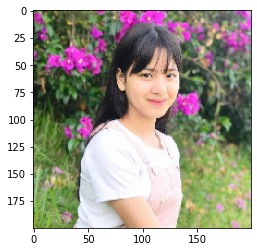

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0] < 0.5:
    print(fn + " you're beautiful")
  else:
    print(fn + " oops average")
 

## Clean Up
Run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)